In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import hamming

C:\Users\Kley2\anaconda3\envs\myenv1\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kley2\anaconda3\envs\myenv1\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Kley2\anaconda3\envs\myenv1\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# CELULAR

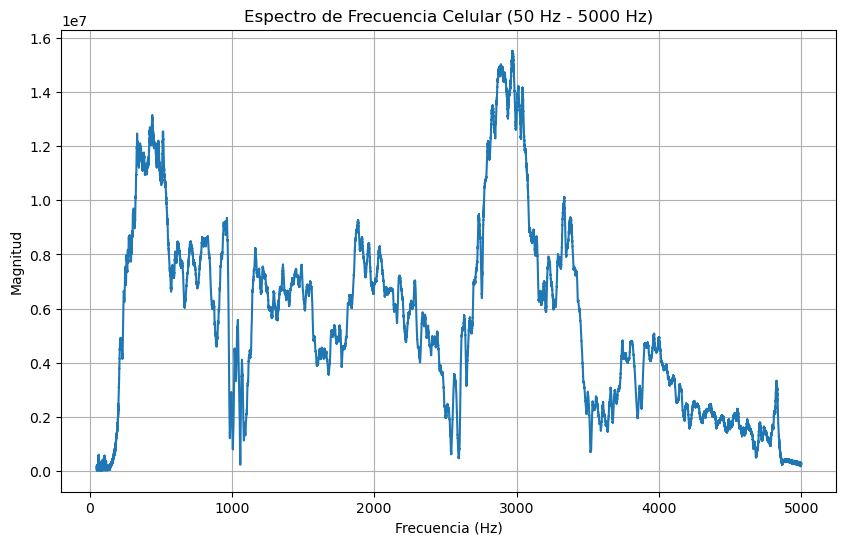

In [26]:

sample_rate_cel, audio_data_cel = wavfile.read('Celular.wav')
frequencies_cel = np.fft.fftfreq(len(audio_data_cel), d=1/sample_rate_cel)
magnitude_spectrum_cel = np.abs(fft(audio_data_cel))

positive_frequencies_cel = frequencies_cel[:len(frequencies_cel)//2]
positive_magnitude_cel = magnitude_spectrum_cel[:len(magnitude_spectrum_cel)//2]

# Definir los límites de frecuencia para la gráfica
lower_limit = 50  # Hz
upper_limit = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index = np.argmax(positive_frequencies_cel >= lower_limit)
upper_index = np.argmax(positive_frequencies_cel >= upper_limit)

# Grafica el espectro de frecuencia limitado
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies_cel[lower_index:upper_index], positive_magnitude_cel[lower_index:upper_index])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia Celular (50 Hz - 5000 Hz)')
plt.grid()
plt.show()


### Probando ventana Hamming

range(0, 502741, 2205)
aa
aa
aa
aa
aa


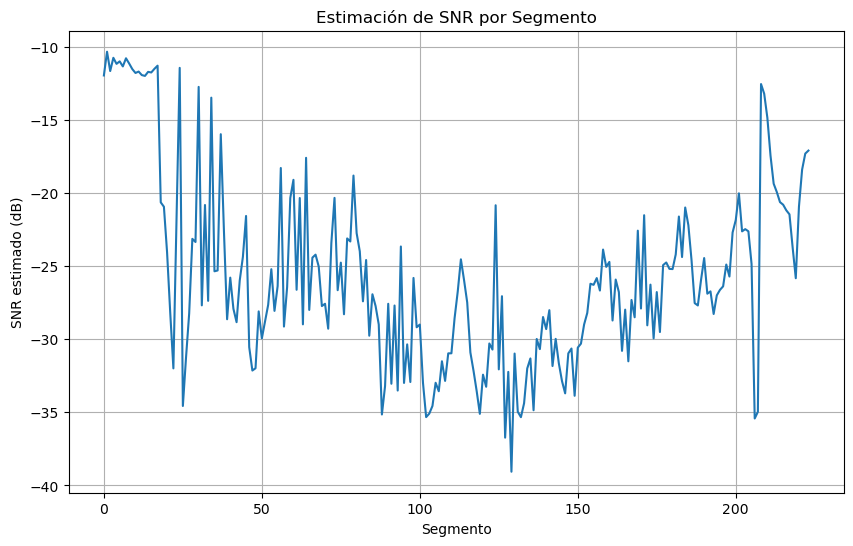

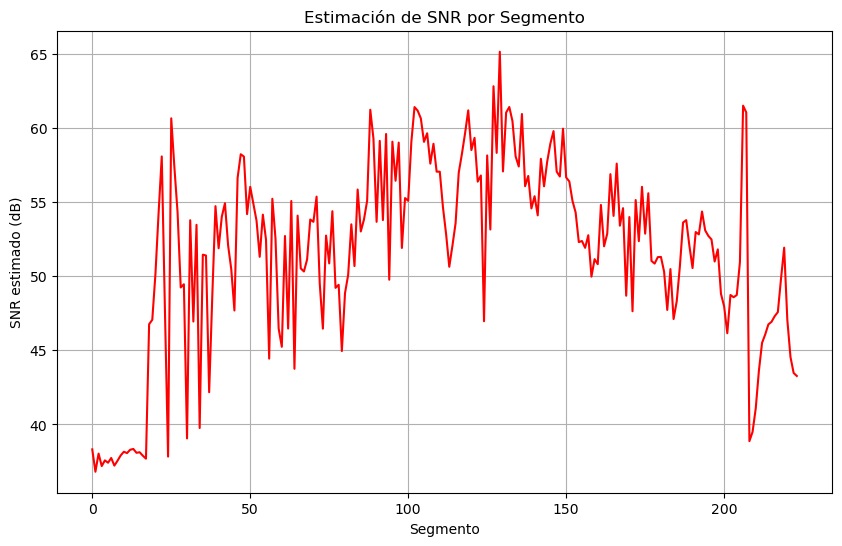

SNR promedio: -25.58 dB
SNR máximo: -10.34 dB
SNR mínimo: -39.06 dB


In [33]:

# Generar el tono de referencia de 1 kHz
#t = np.arange(len(audio_data_cel)) / sample_rate_cel
#reference_tone = 0.5 * np.sin(2 * np.pi * 1000 * t)

sample_rate_celruido, reference_tone = wavfile.read('1kHz_Celular.wav')


# Calcular la potencia del tono de referencia
reference_power = np.sum(reference_tone ** 2) / len(reference_tone)

# Definir parámetros para el análisis de segmentos
segment_length = int(sample_rate_cel * 0.1)  # 100 ms aproximadamente
overlap = int(segment_length * 0.5)  # 50% de superposición

# Calcular la ventana de Hamming
hamming_window = hamming(segment_length)

# Inicializar listas para almacenar las estimaciones de SNR de cada segmento
snr_estimates = []
potencias_senal = []
potencias_ruido = []

print(range(0, len(audio_data_cel) - segment_length + 1, segment_length - overlap))

# Procesar la señal en segmentos
for start in range(0, len(audio_data_cel) - segment_length + 1, segment_length - overlap):

    if start<=8820:
        print("aa")

    else:
        segment = audio_data_cel[start:start + segment_length].astype(np.float64)
        segment *= hamming_window  # Aplicar la ventana de Hamming al segmento
    
        # Calcular la FFT del segmento
        segment_fft = fft(segment)
        positive_frequencies = np.fft.fftfreq(len(segment), d=1/sample_rate_cel)[:len(segment)//2]
        magnitude_spectrum = np.abs(segment_fft)[:len(segment)//2]
    
        # Calcular la potencia total en la banda de interés
        signal_power = np.sum(magnitude_spectrum[lower_index:upper_index] ** 2) / len(magnitude_spectrum[lower_index:upper_index])
    
        # Calcular la potencia del ruido (resta de potencias)
        noise_power = signal_power - reference_power
    
        #print("Signal Power:", signal_power)
        #print("Noise Power:", noise_power)
    
        potencias_senal.append(10*np.log10(signal_power))
        potencias_ruido.append(10*np.log10(noise_power))
    
        # Calcular el SNR en decibelios (dB)
        snr_db = 10 * np.log10(abs(reference_power / noise_power))
        
        snr_estimates.append(snr_db)

# Graficar los valores estimados de SNR por segmento
plt.figure(figsize=(10, 6))
plt.plot(snr_estimates)
plt.xlabel('Segmento')
plt.ylabel('SNR estimado (dB)')
plt.title('Estimación de SNR por Segmento')
plt.grid()
plt.show()


energy = np.sum(np.square(audio_data_cel.astype(float)))
noise_floor = np.min(energy)
ref_amplitude = np.iinfo(audio_data_cel.dtype).max  # Valor máximo de amplitud para el tipo de datos del audio
noise_floor_db = 10 * np.log10(noise_floor / ref_amplitude ** 2)



# Graficar los valores estimados de SNR por segmento
plt.figure(figsize=(10, 6))
plt.plot(potencias_senal,"r")
#plt.plot(20 * np.log10(noise_floor))
plt.xlabel('Segmento')
plt.ylabel('SNR estimado (dB)')
plt.title('Estimación de SNR por Segmento')
plt.grid()
plt.show()



# Mostrar el SNR promedio y máximo de todos los segmentos

average_snr = np.mean(snr_estimates)
max_snr = np.max(snr_estimates)
min_snr = np.min(snr_estimates)
print("SNR promedio: {:.2f} dB".format(average_snr))
print("SNR máximo: {:.2f} dB".format(max_snr))
print("SNR mínimo: {:.2f} dB".format(min_snr))


# COMPUTADORA

C:\Users\Kley2\AppData\Local\Temp\ipykernel_14188\3612439772.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate_lap, audio_data_lap = wavfile.read('Computadora.wav')


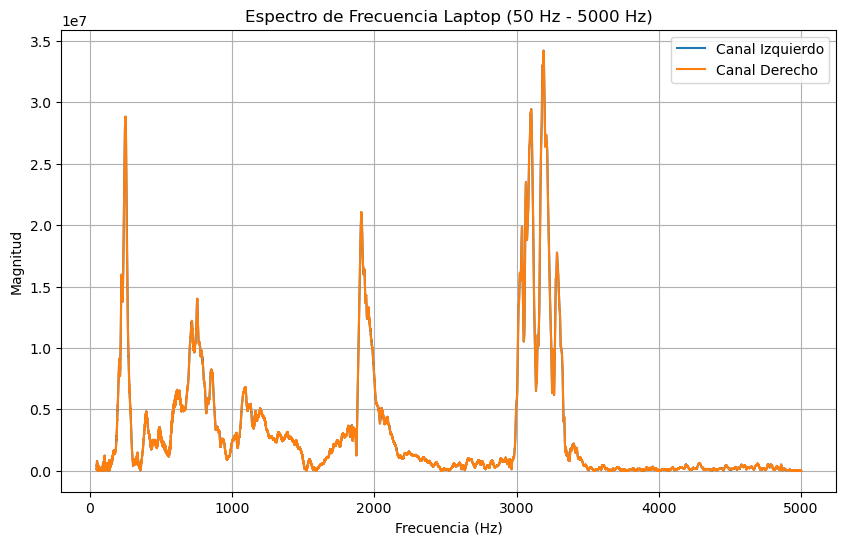

In [4]:
sample_rate_lap, audio_data_lap = wavfile.read('Computadora.wav')
frequencies_lap = np.fft.fftfreq(len(audio_data_lap), d=1/sample_rate_lap)
magnitude_spectrum_lap = np.abs(fft(audio_data_lap))

# Dividir la señal estéreo en dos canales: izquierdo y derecho
left_channel = audio_data_lap[:, 0]  # Canal izquierdo
right_channel = audio_data_lap[:, 1]  # Canal derecho

# Calcular el espectro de frecuencia para cada canal
magnitude_spectrum_left = np.abs(fft(left_channel))
magnitude_spectrum_right = np.abs(fft(right_channel))

positive_frequencies_lap = frequencies_lap[:len(frequencies_lap)//2]

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index = np.argmax(positive_frequencies_lap >= lower_limit)
upper_index = np.argmax(positive_frequencies_lap >= upper_limit)

# Graficar el espectro de frecuencia limitado para el canal izquierdo
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies_lap[lower_index:upper_index], magnitude_spectrum_left[lower_index:upper_index], label='Canal Izquierdo')
plt.plot(positive_frequencies_lap[lower_index:upper_index], magnitude_spectrum_right[lower_index:upper_index], label='Canal Derecho')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia Laptop (50 Hz - 5000 Hz)')
plt.grid()
plt.legend()
plt.show()


### Graficando cada canal por separado

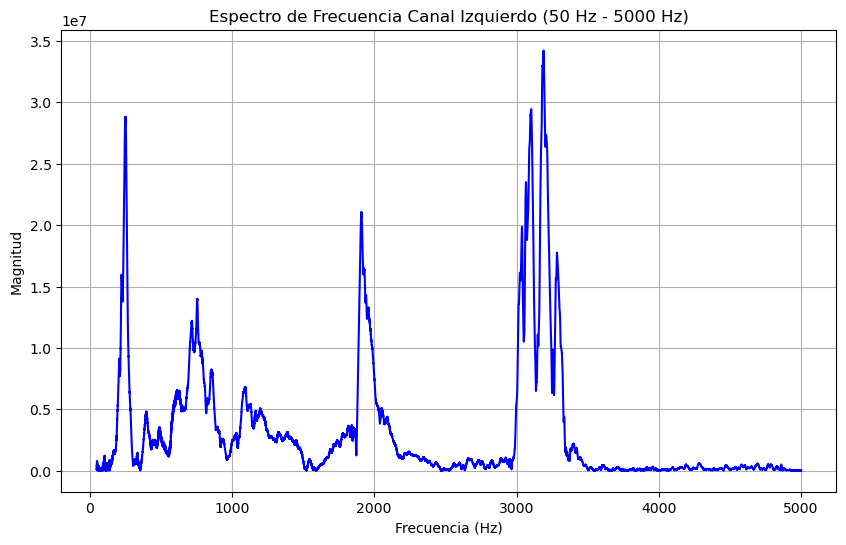

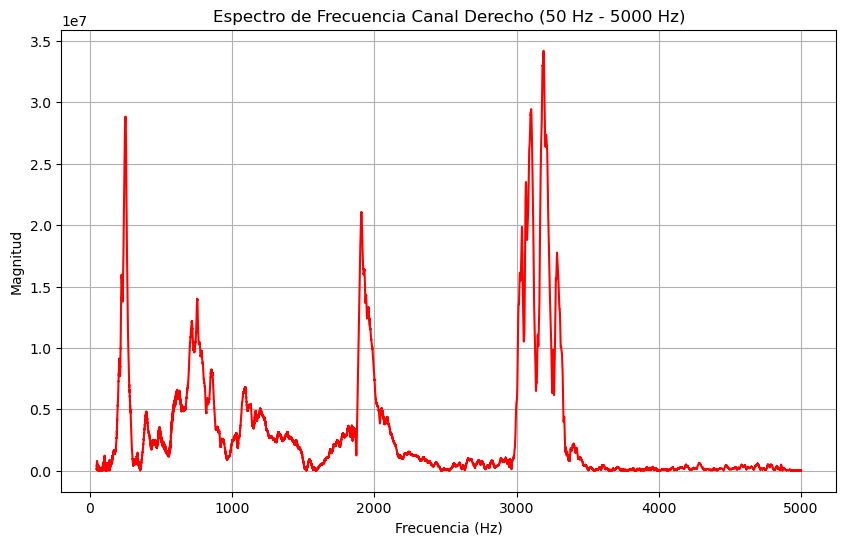

In [5]:
# Graficar el espectro de frecuencia limitado para el canal izquierdo
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies_lap[lower_index:upper_index], magnitude_spectrum_left[lower_index:upper_index], "b")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia Canal Izquierdo (50 Hz - 5000 Hz)')
plt.grid()
plt.show()

# Graficar el espectro de frecuencia limitado para el canal derecho
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies_lap[lower_index:upper_index], magnitude_spectrum_right[lower_index:upper_index], "r")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia Canal Derecho (50 Hz - 5000 Hz)')
plt.grid()
plt.show()

### Probando ventana Hamming

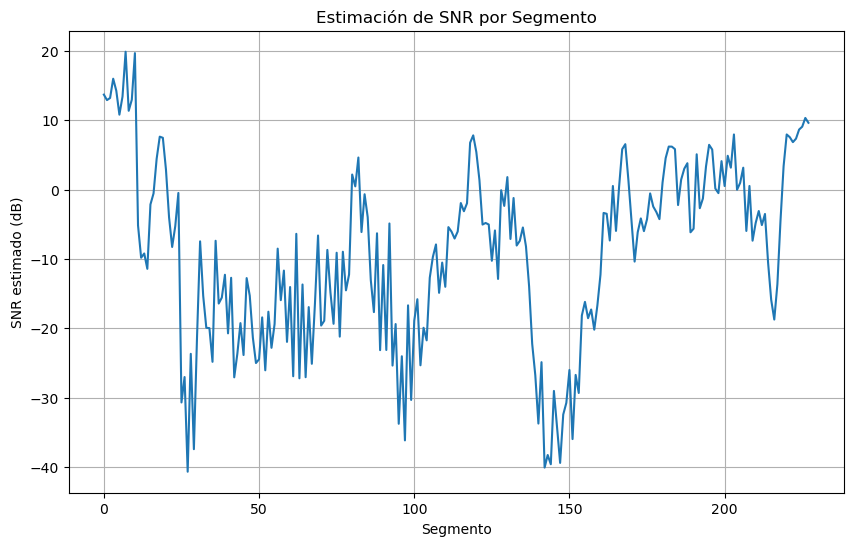

SNR promedio: -9.31 dB
SNR máximo: 19.88 dB
SNR mínimo: -40.70 dB


In [6]:
audio_data_lap = audio_data_lap[:, 0] # Dejando solo el canal izquierdo para evitar problemas

# Generar el tono de referencia de 1 kHz
#t = np.arange(len(audio_data_lap)) / sample_rate_lap

sample_rate_lapruido, reference_tone = wavfile.read('1kHz_Laptop.wav')

reference_tone = reference_tone[:, 0]

# Definir parámetros para el análisis de segmentos
segment_length = int(sample_rate_lap * 0.1)  # 100 ms aproximadamente
overlap = int(segment_length * 0.5)  # 50% de superposición

# Calcular la ventana de Hamming
hamming_window = hamming(segment_length)

# Inicializar listas para almacenar las estimaciones de SNR de cada segmento
snr_estimates = []

# Procesar la señal en segmentos
for start in range(0, len(audio_data_lap) - segment_length + 1, segment_length - overlap):
    segment = audio_data_lap[start:start + segment_length].astype(np.float64)
    segment *= hamming_window  # Aplicar la ventana de Hamming al segmento

    # Calcular la FFT del segmento
    segment_fft = fft(segment)
    positive_frequencies = np.fft.fftfreq(len(segment), d=1/sample_rate_lap)[:len(segment)//2]
    magnitude_spectrum = np.abs(segment_fft)[:len(segment)//2]

    # Calcular la potencia total en la banda de interés
    signal_power = np.sum(magnitude_spectrum[lower_index:upper_index] ** 2) / len(magnitude_spectrum[lower_index:upper_index])

    # Calcular la potencia del ruido (resta de potencias)
    noise_power = signal_power - reference_power

    # Calcular el SNR en decibelios (dB)
    snr_db = 10 * np.log10(abs(reference_power / noise_power))
    
    snr_estimates.append(snr_db)

    #print("Signal Power:", signal_power)
    #print("Noise Power:", noise_power)

# Graficar los valores estimados de SNR por segmento
plt.figure(figsize=(10, 6))
plt.plot(snr_estimates)
plt.xlabel('Segmento')
plt.ylabel('SNR estimado (dB)')
plt.title('Estimación de SNR por Segmento')
plt.grid()
plt.show()

# Mostrar el SNR promedio y máximo de todos los segmentos
average_snr = np.mean(snr_estimates)
max_snr = np.max(snr_estimates)
min_snr = np.min(snr_estimates)
print("SNR promedio: {:.2f} dB".format(average_snr))
print("SNR máximo: {:.2f} dB".format(max_snr))
print("SNR mínimo: {:.2f} dB".format(min_snr))


259.63193438178956
39.50723356806082


C:\Users\Kley2\AppData\Local\Temp\ipykernel_14188\3292792621.py:33: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spectrogram), aspect='auto', origin='lower',


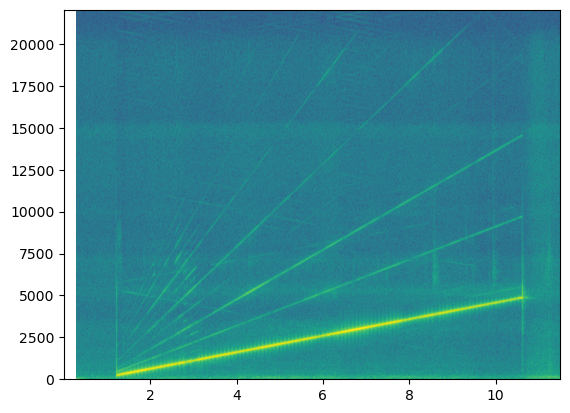

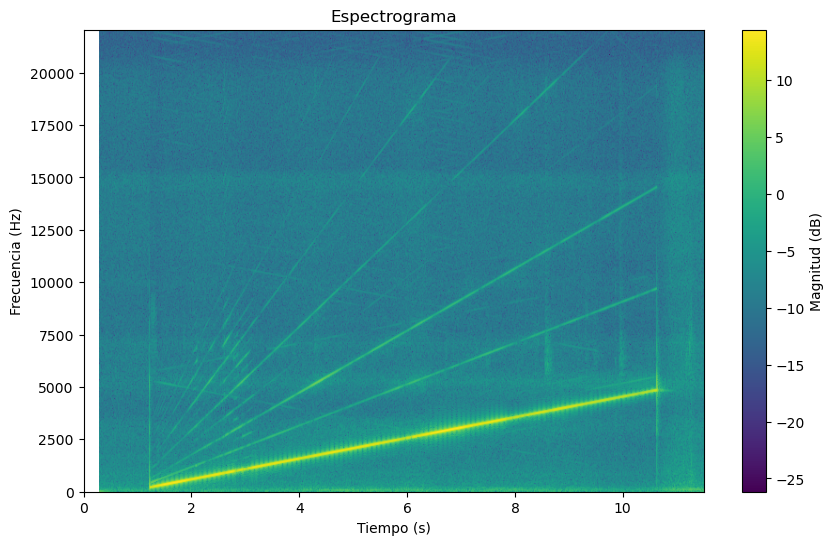

In [22]:
# Cargar el archivo de audio
sample_rate, audio_data = wavfile.read('Celular.wav')

# Parámetros para el cálculo del espectrograma
n_fft = 1024  # Tamaño de la ventana de FFT
hop_length = 256  # Tamaño del salto entre ventanas

# Calcular el espectrograma
spectrogram, frequencies, times, im = plt.specgram(audio_data, NFFT=n_fft, Fs=sample_rate,
                                                   noverlap=hop_length, cmap='viridis')


energy = np.sum(np.square(audio_data.astype(float)))
noise_floor = np.min(energy)
ref_amplitude = np.iinfo(audio_data.dtype).max  # Valor máximo de amplitud para el tipo de datos del audio
noise_floor_db = 10 * np.log10(noise_floor / ref_amplitude ** 2)


print(20 * np.log10(noise_floor))
print(noise_floor_db)


#energy= np.mean(spectrogram,axis=0)
#pisoruido = np.min(energy)
#print(pisoruido)





# Graficar el espectrograma
plt.figure(figsize=(10, 6))
plt.imshow(np.log(spectrogram), aspect='auto', origin='lower',
           extent=[0, len(audio_data) / sample_rate, 0, sample_rate / 2])
plt.colorbar(label='Magnitud (dB)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma')
plt.show()